# Report for the Machine Learning with Python lab Course

## 1. Import the essential libraries for machine learning processing and plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. Dataframe analysis

### 2.1. Looking for missing values

First, we load the dataframe and check its dimensions and the columns' names.

In [2]:
df_stroke = pd.read_csv("stroke_data.csv")
print("The dimension of the dataframe stroke is equal to ", df_stroke.shape, ".\n")
print(df_stroke.head(10))


The dimension of the dataframe stroke is equal to  (5110, 12) .

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural 

Now, we check the uniques values for each column and their types. It is important to distinguish among numerical and categorical attributes, check for incompatibilities in the data, and missing values.

In [3]:
print("It shows how many missing values each column have: ")
print(df_stroke.isna().sum(), "\n")

for column in df_stroke:
    print("The unique type in the column ", column, "\n", df_stroke[column].apply(type).unique())
    print("Unique values for the attribute: ", column, "\n", df_stroke[column].unique(), '\n\n')

It shows how many missing values each column have: 
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64 

The unique type in the column  id 
 [<class 'int'>]
Unique values for the attribute:  id 
 [ 9046 51676 31112 ... 19723 37544 44679] 


The unique type in the column  gender 
 [<class 'str'>]
Unique values for the attribute:  gender 
 ['Male' 'Female' 'Other'] 


The unique type in the column  age 
 [<class 'float'>]
Unique values for the attribute:  age 
 [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 

Some missing values appear here for the features "bmi" (NA), "gender" (other), and "smoking_status" (unknown). Such situation will deserve an analysis on the second cell below.

Now, we verifiy some statistical properties of the numerical attributes in this dataframe. In the table below, we need to take care when combining variables, since they have different range of values. More analysis will be done with graphic visualization.

In [4]:
# Analyse using pandas to describe the numerical values (mean, variance, etc);
print(df_stroke.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

Now, we check the proportion of unknown values for the attributes "bmi", "gender", and "smoking_status":

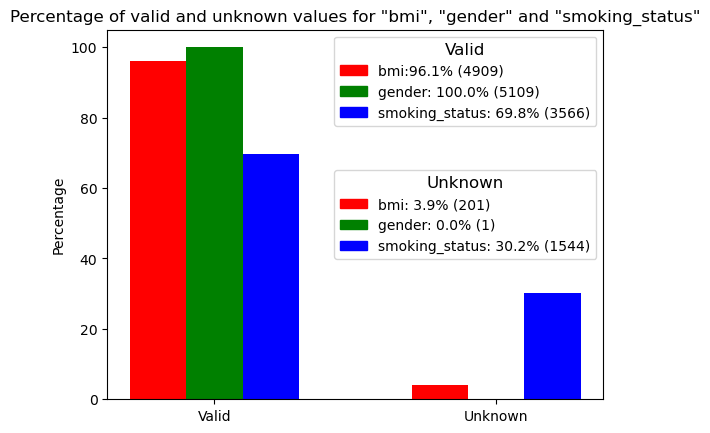

In [5]:
import matplotlib.patches as mpatches

# Non-NA values
non_na_bmi = df_stroke['bmi'].dropna()
non_na_gender = df_stroke[df_stroke['gender'] != 'Other']
non_na_smoking_status = df_stroke[df_stroke['smoking_status'] != 'Unknown']

# Missing, or unknown values 
na_bmi = df_stroke[df_stroke['bmi'].isna()]
na_gender = df_stroke[df_stroke['gender'] == 'Other']
na_smoking_status = df_stroke[df_stroke['smoking_status'] == 'Unknown']

# Calculate percentages and counts for non-NA values
non_na_percentages = [(len(col) / len(df_stroke)) * 100 for col in [non_na_bmi, non_na_gender, non_na_smoking_status]]
non_na_counts = [len(col) for col in [non_na_bmi, non_na_gender, non_na_smoking_status]]

# Calculate percentages and counts for NA values
na_percentages = [(len(col) / len(df_stroke)) * 100 for col in [na_bmi, na_gender, na_smoking_status]]
na_counts = [len(col) for col in [na_bmi, na_gender, na_smoking_status]]

# Define positions for bars
non_na_positions = np.arange(3)
na_positions = np.arange(5,8)

positions = np.concatenate((non_na_positions, na_positions))

# Plot histogram for non-NA values
non_na_bars = plt.bar(non_na_positions - 0.5, non_na_percentages, width=1, color=['red', 'green', 'blue'])

# Add percentage and count above each bar for non-NA values
legend_non_na = []
for percentage, count in zip(non_na_percentages, non_na_counts):
    legend_non_na.append(f'{percentage:.1f}% ({count})')

# Plot histogram for NA values
na_bars = plt.bar(na_positions - 0.5, na_percentages, width=1, color=['red', 'green', 'blue'])

# Add percentage and count above each bar for NA values
legend_na = []
for percentage, count in zip(na_percentages, na_counts):
    legend_na.append(f'{percentage:.1f}% ({count})')

plt.xticks([0.5, 5.5], ['Valid', 'Unknown'])
plt.ylabel('Percentage')

# Create legend
valid_patch1 = mpatches.Patch(color='red', label='bmi:' + legend_non_na[0])
valid_patch2 = mpatches.Patch(color='green', label='gender: ' + legend_non_na[1])
valid_patch3 = mpatches.Patch(color='blue', label='smoking_status: ' + legend_non_na[2])
unknown_patch1 = mpatches.Patch(color='red', label='bmi: ' + legend_na[0])
unknown_patch2 = mpatches.Patch(color='green', label='gender: ' + legend_na[1])
unknown_patch3 = mpatches.Patch(color='blue', label='smoking_status: ' + legend_na[2])

# Add legend
legend1 = plt.legend(handles=[valid_patch1, valid_patch2, valid_patch3], title='Valid', loc='upper right', title_fontsize='large')
legend2 = plt.legend(handles=[unknown_patch1, unknown_patch2, unknown_patch3], title='Unknown', loc='center right', title_fontsize='large')

plt.gca().add_artist(legend1)
plt.title('Percentage of valid and unknown values for "bmi", "gender" and "smoking_status"')
plt.show()

The bar histogram above shows us that mainly for the attribute smoking status, unknown values are problematic since they represent 30.2% of the total of instances in the dataframe. 

The histogram above gives shows the distribution of values for these three variables. 

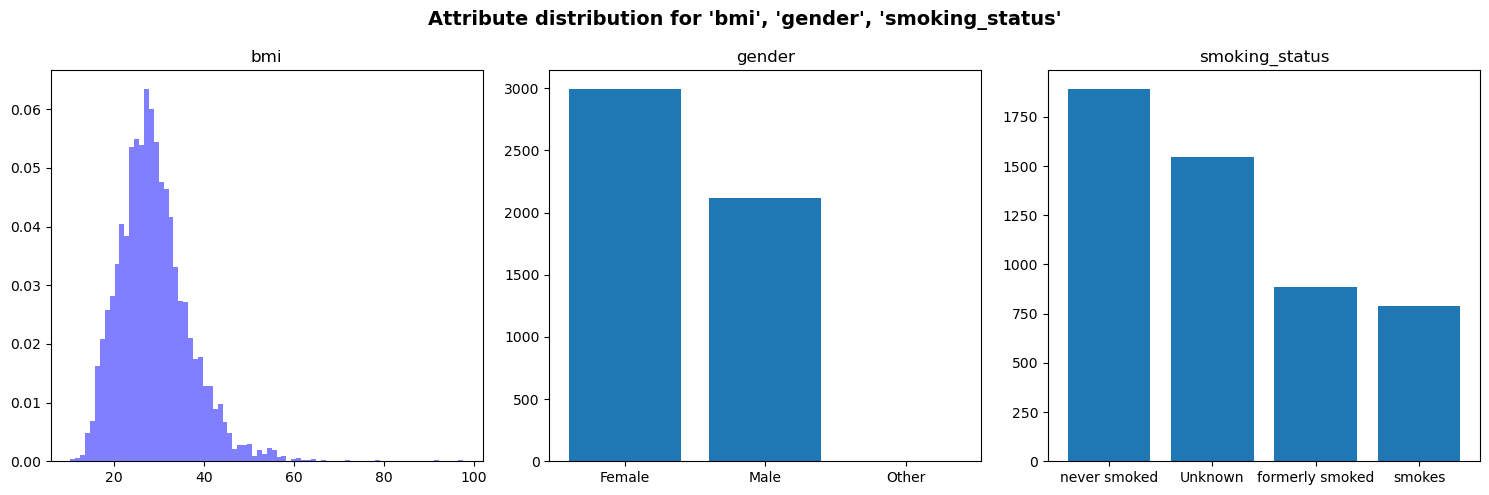

In [6]:
# Show histograms for the three values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_stroke['bmi'].dropna(), bins=80, color='blue', alpha=0.5, density=True)
plt.title('bmi')

# Define the colors for each attribute
columns = ['gender', 'smoking_status']
for i, column in enumerate(columns):
    counts = df_stroke[column].value_counts()
    plt.subplot(1, 3, i + 2)
    plt.bar(counts.index, counts.values)

    plt.title(column)

plt.suptitle("Attribute distribution for 'bmi', 'gender', 'smoking_status'", weight='bold', size=14)
plt.tight_layout()
plt.show()


As the instances for 'smoking_status' that are unknow correspond to a percentage of 30.2%, it is necessary to explore more these missing values in order to evaluate how to proceed. Let's check the relationship between these value and the target variable stroke.

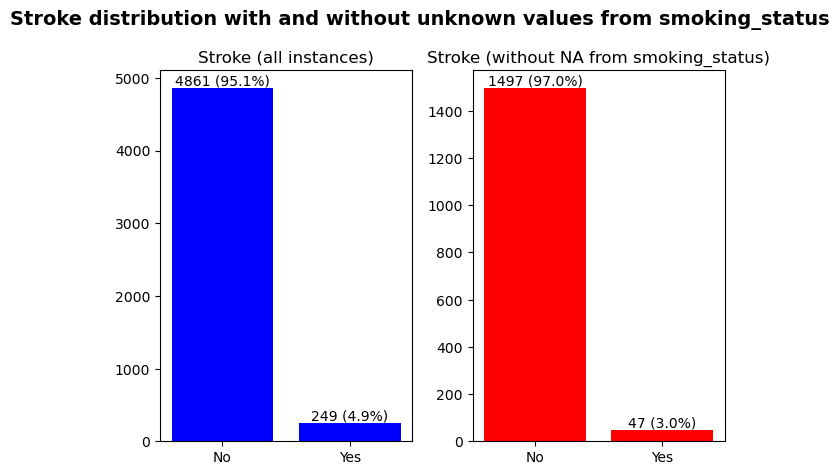

In [7]:
# Check the relationship between unknown values in 'smoking_status' and 'stroke'
mapping = {0: 'No', 1: 'Yes'}

plt.subplot(1, 2, 1)
df_stroke_map = df_stroke['stroke'].replace(mapping)
counts = df_stroke_map.value_counts()
percentages = df_stroke_map.value_counts(normalize=True) * 100
bars = plt.bar(counts.index, counts.values, color = 'blue', label='Stroke')

# Add count and percentage above each bar
for bar,label in zip(bars, counts.index):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)} ({percentages[label]:.1f}%)', ha='center', va='bottom')
plt.title("Stroke (all instances)")

plt.subplot(1, 2, 2)
st_na = df_stroke.loc[df_stroke['smoking_status'] == 'Unknown', ['stroke']]
df_stroke_map = st_na['stroke'].replace(mapping)
counts = df_stroke_map.value_counts()
percentages = df_stroke_map.value_counts(normalize=True) * 100
bars = plt.bar(counts.index, counts.values, color = 'red', label='Stroke')

# Add count and percentage above each bar
for bar,label in zip(bars, counts.index):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)} ({percentages[label]:.1f}%)', ha='center', va='bottom')

plt.suptitle("Stroke distribution with and without unknown values from smoking_status", weight='bold', size=14)
plt.title("Stroke (without NA from smoking_status)") 
plt.tight_layout()
plt.show()


These missing values are almost uniformily distributed among the two possible values for the attribute stroke. 

Let's check if the conditional probability of stroke given smoking_status can clarify us with more information:

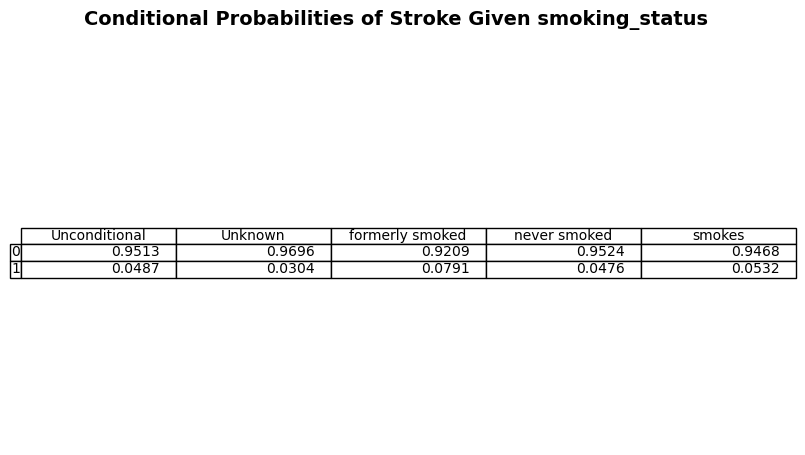

In [8]:
def table_conditional_prob(columns):

    for column in columns:
            
        # Create cross-tabulation
        cross_tab = pd.crosstab(df_stroke['stroke'], df_stroke[column])

        # Calculate conditional probabilities
        conditional_prob = cross_tab.div(cross_tab.sum(axis=0), axis=1)

        # Calculate unconditional probabilities
        unconditional_prob = df_stroke['stroke'].value_counts(normalize=True)

        # Add unconditional probabilities to the table
        conditional_prob.insert(0, 'Unconditional', unconditional_prob)

        # Convert index to string type
        conditional_prob.index = conditional_prob.index.astype(str)

        # Plot table
        plt.figure(figsize=(10, 5))  
        plt.axis('off')  # Hide axes
        table = plt.table(cellText=conditional_prob.round(4).values, colLabels=conditional_prob.columns, rowLabels=conditional_prob.index, loc='center')
        # table.auto_set_font_size(False)
        plt.suptitle('Conditional Probabilities of Stroke Given ' + column, fontsize=14, fontweight='bold')
        table.set_fontsize(10)
        table.scale(1, 1) 

        plt.show()
        
table_conditional_prob(['smoking_status'])

The table above shows it is noticeable the influence of the 'unknown' status for the conditional probability when compared, for instance, with 'never_smoked', and 'smokes'. But, for the moment, we skip this variable since it is difficult to decide in advantage how to proceed about these missing values. We will decide later how to proceed based in first inferences.

In [9]:
#table_conditional_prob(['gender'])

In [10]:
#table_conditional_prob(['hypertension'])

In [11]:
#table_conditional_prob(['heart_disease'])

In [12]:
#table_conditional_prob(['ever_married'])

In [13]:
#table_conditional_prob(['work_type'])

In [14]:
#table_conditional_prob(['Residence_type'])

### 2.2. Attributes relationship and analysis


We will check for a linear relationship in the dataframe when plotting a heatmap for a correlation matrix for all the variables. In this case, we create dummy variables for non-numerical variables:

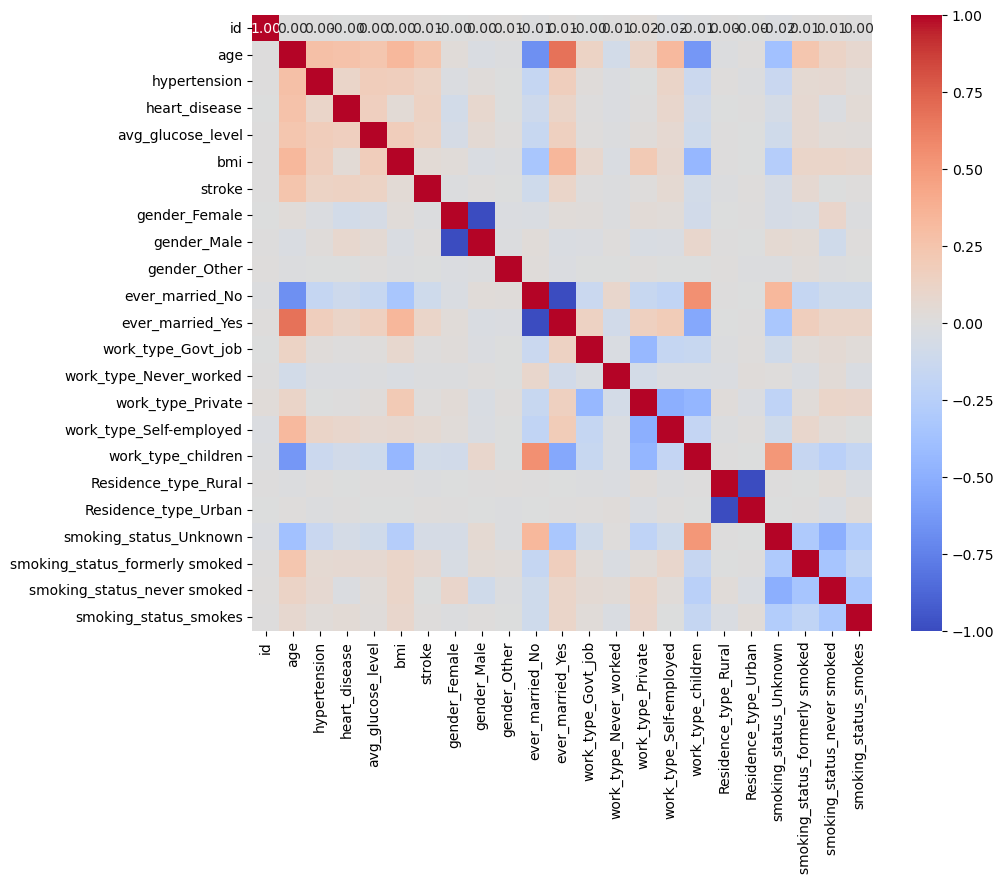

In [15]:
df_stroke_dummies = pd.get_dummies(df_stroke)

# Calculate correlation matrix
corr_matrix = df_stroke_dummies.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In the above graphic, there are some variables that are linearly related, such as, "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", and "stroke". So, they look good candidates for a first test using linear models.

Before to proceed, let's check how is the value distribution for each of the attributes in the dataframe.

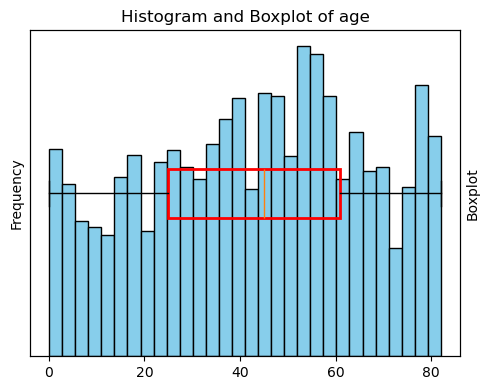

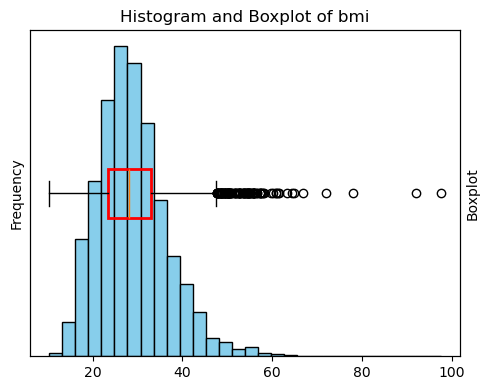

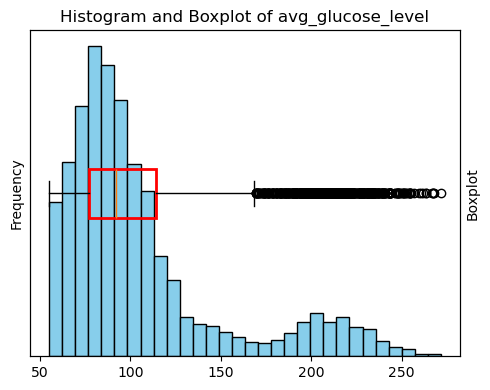

In [16]:
def plot_histogram_boxplot(df, columns):
    for column in columns:
        # Create subplots
        fig, ax1 = plt.subplots(figsize=(5, 4))

        # Plot histogram
        ax1.hist(df[column], bins=30, color='skyblue', edgecolor='black')
        ax1.set_title(f'Histogram and Boxplot of {column}')
        ax1.set_ylabel('Frequency')

        # Create second y-axis for boxplot
        ax2 = ax1.twinx()

        # Plot boxplot
        ax2.boxplot(df[column].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor='none', edgecolor='red', linewidth=2))  # dropna() to avoid error if there are missing values
        ax2.set_ylabel('Boxplot')
        
        # Remove numerical values on y-axis for boxplot
        ax1.set_yticks([])
        ax2.set_yticks([])

        # Display plots
        plt.tight_layout()
        plt.show()

# Choose linear attributes
columns = ['age', 'bmi', 'avg_glucose_level']  
plot_histogram_boxplot(df_stroke, columns)

In the histograms above, the data is highly biased for 'bmi', and 'avg_glucose_level', and for 'age' is more uniformily distributed. An interesting possibility for visualization can be to check, for each bin, what is the proportion for each stroke values.
                                                                                                                                                                                                                 

C:\Users\MDv\AppData\Local\Temp\ipykernel_24836\1837827230.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(column_data, bins, precision=0))[target_column].value_counts(normalize=True).unstack()


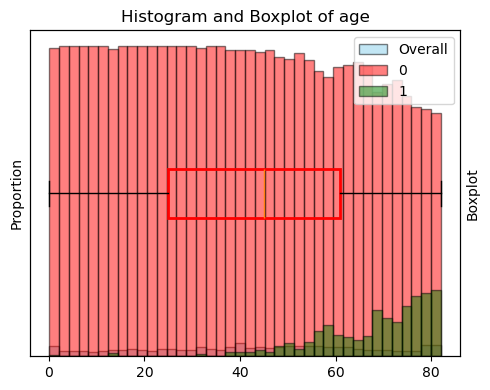

C:\Users\MDv\AppData\Local\Temp\ipykernel_24836\1837827230.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(column_data, bins, precision=0))[target_column].value_counts(normalize=True).unstack()


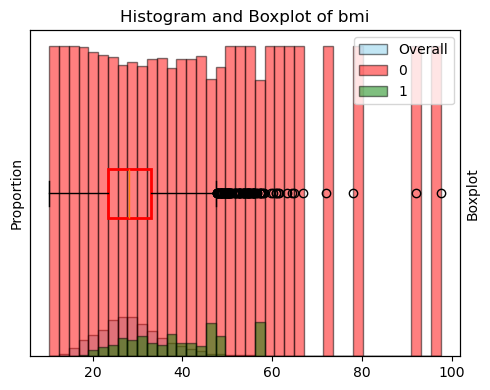

C:\Users\MDv\AppData\Local\Temp\ipykernel_24836\1837827230.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(column_data, bins, precision=0))[target_column].value_counts(normalize=True).unstack()


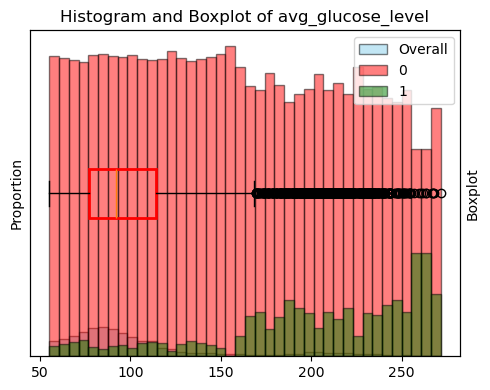

In [17]:
def plot_grouped_histogram_boxplot(df, columns, target_column):
    for column in columns:
        # Drop NaN values from the column
        column_data = df[column].dropna()

        # Create subplots
        fig, ax1 = plt.subplots(figsize=(5, 4))

        # Calculate proportions
        bins = 40
        grouped = df.groupby(pd.cut(column_data, bins, precision=0))[target_column].value_counts(normalize=True).unstack()

        # Calculate the bin edges
        bin_edges = pd.cut(column_data, bins, precision=0).unique().sort_values()

        # Plot overall distribution
        counts, bin_edges = np.histogram(column_data, bins=bins)
        ax1.hist(bin_edges[:-1], bin_edges, weights=counts/counts.sum(), color='skyblue', edgecolor='black', alpha=0.5, label='Overall')

        # Plot grouped histogram
        for i, (group, color) in enumerate(zip(grouped.columns, ['red', 'green'])):
            # Calculate the width of the bins
            bin_width = bin_edges[1:] - bin_edges[:-1]
            ax1.bar(bin_edges[:-1] + bin_width/2, grouped[group], width=bin_width, color=color, alpha=0.5, label=str(group), edgecolor='black')

        ax1.set_title(f'Histogram and Boxplot of {column}')
        ax1.set_ylabel('Proportion')

        # Create second y-axis for boxplot
        ax2 = ax1.twinx()

        # Plot boxplot
        ax2.boxplot(column_data, vert=False, patch_artist=True,
                    boxprops=dict(facecolor='none', edgecolor='red', linewidth=2))
        ax2.set_ylabel('Boxplot')

        # Remove numerical values on y-axis for boxplot
        ax1.set_yticks([])
        ax2.set_yticks([])

        # Add legends
        ax1.legend()

        # Display plots
        plt.tight_layout()
        plt.show()

columns = ['age', 'bmi', 'avg_glucose_level'] 
target_column = 'stroke'  
plot_grouped_histogram_boxplot(df_stroke, columns, target_column)

The graphs above allow us some study about bias towards people that suffer a stroke: high index of glucose, older, and low body mass index. However such imbalance for the data make us face some challenges to deal with such bias. We can evaluate for other variables as well, and look for some tips how to train our data.

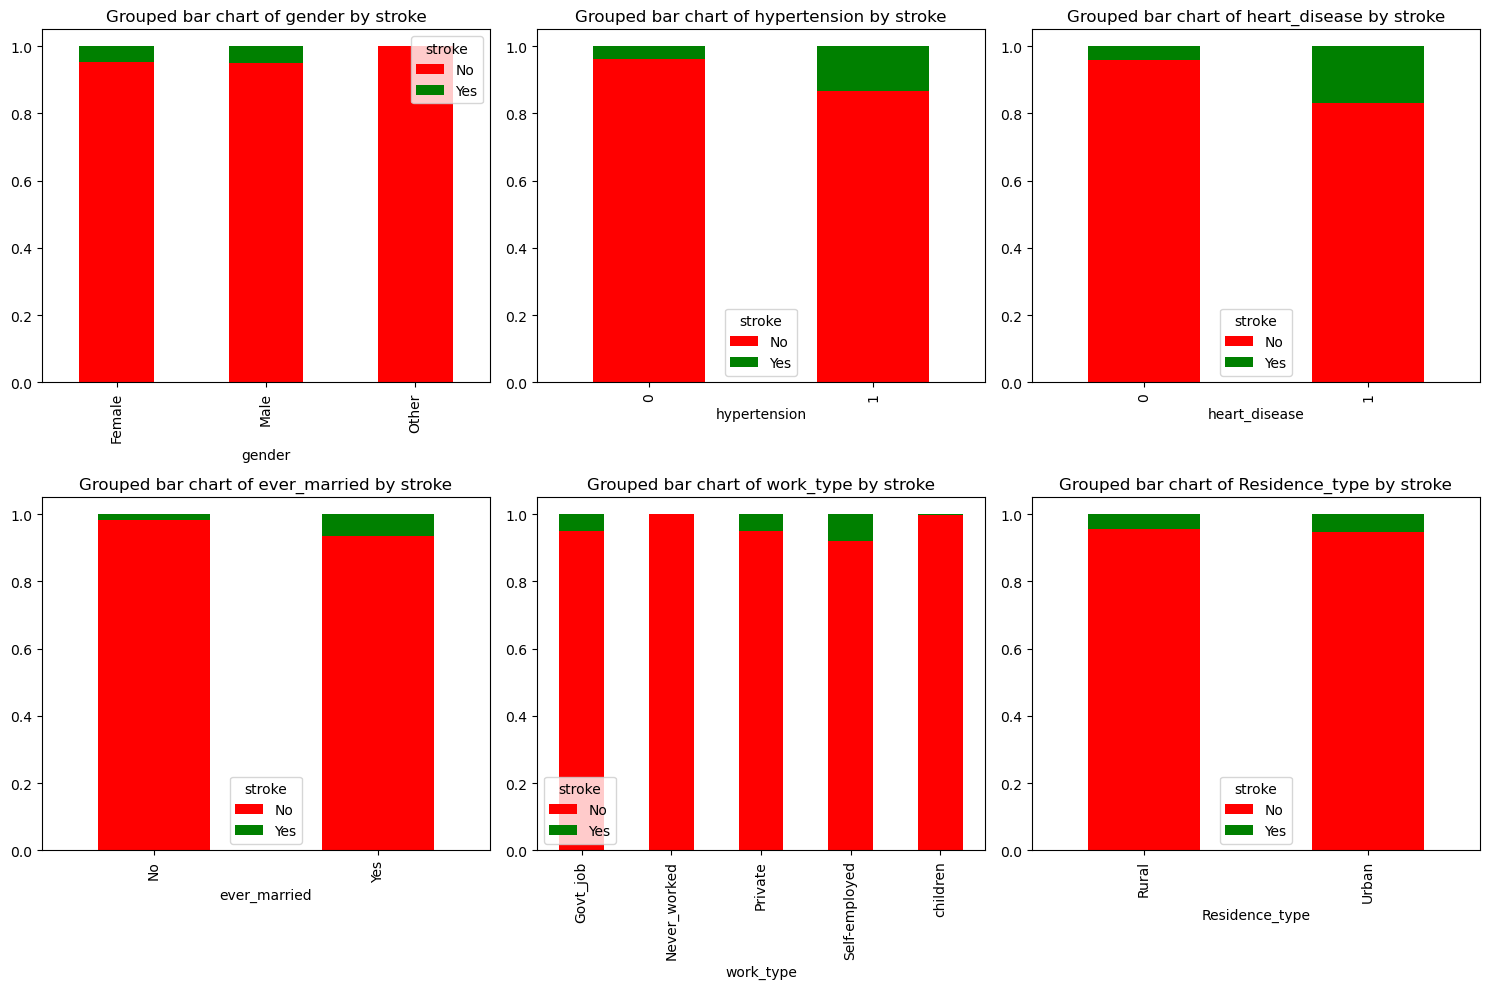

In [18]:
def plot_bar_charts(df, columns, target_column='stroke'):
    df_stroke_map = df_stroke.copy()
    df_stroke_map['stroke'] = df_stroke_map['stroke'].replace(mapping).copy()
    
    proportions = df_stroke_map[target_column].value_counts(normalize=True)
    colors = plt.cm.viridis(np.linspace(0, 1, len(proportions)))

    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i, column in enumerate(columns):
        # Calculate row and column index for subplot
        row = i // 3
        col = i % 3

        # Calculate proportions
        proportions = df_stroke_map.groupby(column)[target_column].value_counts(normalize=True).unstack()

        # Plot grouped bar chart
        proportions.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[row, col])

        axs[row, col].set_title(f'Grouped bar chart of {column} by {target_column}')

    # Display plots
    plt.tight_layout()
    plt.show()

# Assuming df_stroke is your DataFrame
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']  # Replace with your column names
plot_bar_charts(df_stroke_map, columns)

As in the previous graphs, here we have bias towards the true negative for stroke.

### 3.1 Cleaning and training

Below, we create some functions that will help us to have some metric to evaluate the performance of the algorithms used for classification.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from itertools import combinations

def train_evaluate_model(model, df, target_column='stroke', test_size=0.2, random_state=100):

    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #print("Training Accuracy:", metrics.accuracy_score(y_train, y_train_pred))
    #print("Test Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
    
    return (metrics.accuracy_score(y_train, y_train_pred), \
            metrics.accuracy_score(y_test, y_test_pred), \
            y_train, y_train_pred, y_test, y_test_pred)

def eval_predictions(y_train, y_train_pred, y_test, y_test_pred):
    # Confusion matrices for training and test
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    
    # Precision, recall and f1-score for training
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    
    # Precision, recall and f1-score for test
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    # Return all the scores above
    return (cm_train, cm_test, precision_train, recall_train, precision_test, recall_test, f1_train, f1_test) 

def encode_df(df):
    le = LabelEncoder()
    
    # Converting categorical variables to encoded numerical versions
    df_enc_ori = df.copy()
    df_enc_ori['gender'] = le.fit_transform(df_enc_ori['gender'])
    df_enc_ori['ever_married'] = le.fit_transform(df_enc_ori['ever_married'])
    df_enc_ori['work_type'] = le.fit_transform(df_enc_ori['work_type'])
    df_enc_ori['Residence_type'] = le.fit_transform(df_enc_ori['Residence_type'])
    df_enc_ori['smoking_status'] = le.fit_transform(df_enc_ori['smoking_status'])
    df_enc_ori['Residence_type'] = le.fit_transform(df_enc_ori['Residence_type'])

    # Return an encoded version for training
    return df_enc_ori

def all_combinations(lst):
    # Given a set of attributes, return all possible combinations among them
    return [list(combo) for i in range(len(lst)) for combo in combinations(lst, i+1)]


def accuracy_all_combinations(df_enc, model, columns, target_column='stroke'):
    # It will generate all combinations for a set of attributes
    combinations = all_combinations(columns)
    
    # For the elected attributes, NA values are removed
    df_enc = df_enc.dropna()
    
    # Encode categorial variables into numerical ones
    df_enc = encode_df(df_stroke)

    # It defines dictionaries that will keep the track of the best scores (training, test, precision, etc)
    dict_acc = {"train": (0, ''), "test": (0, ''), "max_train_test": (0, 0, 0, '')}
    dict_eval = {"cm_train": 0, "cm_test": 0, "precision_train": 0, "precision_test": 0, \
                 "recall_train": 0, "recall_test": 0, "f1_train": 0, "f1_test": 0, "attributes": []}

    # Train the model for all the different combinations 
    for combination in combinations:
        # It reescale the columns based in their range of values
        scaler = StandardScaler()
        df_enc[columns] = scaler.fit_transform(df_enc[columns])
        df_enc1 = df_enc.loc[:, ['stroke'] + combination]
        df_enc1 = df_enc1.dropna()
        acc_train, acc_test, y_train, y_train_pred, y_test, y_test_pred = train_evaluate_model(model, df_enc1)
      
        # It takes just the best values of scores
        if acc_train > dict_acc["train"][0]:
            dict_acc["train"] = (acc_train, combination)
        if acc_test > dict_acc["test"][0]:
            dict_acc["test"] = (acc_test, combination) 
        if acc_train + acc_test > dict_acc["max_train_test"][0]:
            dict_acc["max_train_test"] = (acc_train + acc_test, acc_train, acc_test, combination)
        if f1_score(y_train, y_train_pred) + f1_score(y_test, y_test_pred) > dict_eval["f1_train"] + dict_eval["f1_test"]:
            dict_eval["cm_train"], dict_eval["cm_test"], dict_eval["precision_train"], dict_eval["precision_test"], dict_eval["recall_train"], dict_eval["recall_test"], dict_eval["f1_train"], dict_eval["f1_test"] = \
                eval_predictions(y_train, y_train_pred, y_test, y_test_pred) 
            
            dict_eval["attributes"] = combination
        print('\n')
    
    return dict_acc, dict_eval

# Print accuracy for training, test, and the best combination of attributes
def print_best_acc(dict_acc):
    print("Best accuracy for training = ", dict_acc["train"][0], " with columns: ", dict_acc["train"][1])
    print("Best accuracy for test = ", dict_acc["test"][0], " with columns: ", dict_acc["test"][1])
    print("Best overall accuracy: train = ", dict_acc["max_train_test"][1], \
                               ", test = ", dict_acc["max_train_test"][2], \
                              " with columns: ", dict_acc["max_train_test"][3])

# Print the different scores for training, and test
def print_eval(dict_eval):
    print("Confusion matrix for training: ", dict_eval['cm_train'])
    print("Confusion matrix for test: ", dict_eval['cm_test'])
    print("Precision for training: ", dict_eval['precision_train'])
    print("Precision for test: ", dict_eval['precision_test'])
    print("Recall for training: ", dict_eval['recall_train'])
    print("Recall for test: ", dict_eval['recall_test']) 
    print("F1-score for train: ", dict_eval['f1_train'])
    print("F1-score for test: ", dict_eval['f1_test'])
    print("Best combination for f1-score: ", dict_eval['attributes'])  


For our first model for classification, we just take into account the variables that have showed linear correlation over the heatmap: 'bmi', 'gender', 'ever_married', 'work_type', and 'Residence_type', and we verify how they act together or separately for logistic regression (It is expected not much distinction).

In [20]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=100)

# Linearly correlated attributes
decorr_col = ['bmi', 'gender', 'ever_married', 'work_type', 'Residence_type']

# Model evaluation
dict_acc, dict_eval = accuracy_all_combinations(df_stroke, model, decorr_col)
print_best_acc(dict_acc)
print_eval(dict_eval)

































































Best accuracy for training =  0.9602750190985485  with columns:  ['bmi']
Best accuracy for test =  0.9460285132382892  with columns:  ['bmi']
Best overall accuracy: train =  0.9602750190985485 , test =  0.9460285132382892  with columns:  ['bmi']
Confusion matrix for training:  0
Confusion matrix for test:  0
Precision for training:  0
Precision for test:  0
Recall for training:  0
Recall for test:  0
F1-score for train:  0
F1-score for test:  0
Best combination for f1-score:  []


Increasing the number of variables to feed the model does not increase the performance. What makes sense since they have a linear relationship, and the model used here is linear as well.

Even if the accuracy provides good results when using only one attribute, i.e. 'bmi', scores like precision, and recall, and the confusion matrix show another reality: the unbalanced data just has true negative, and false negative. 

We can have a plot that shows a behavior that clarify this point:

<Axes: xlabel='bmi', ylabel='stroke'>

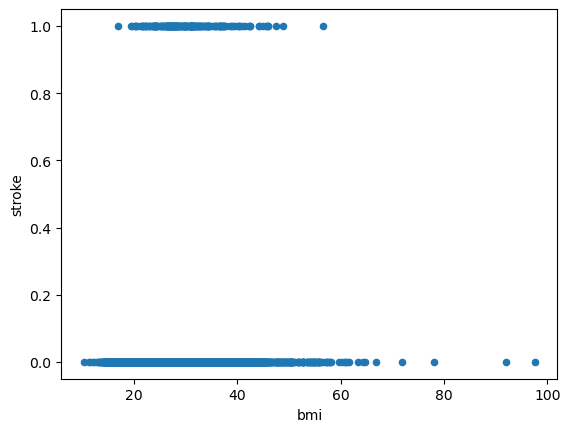

In [21]:
# Assuming df_feature_ext is your DataFrame and 'column1' and 'column2' are the names of your columns
df_stroke.plot(x='bmi', y='stroke', kind='scatter')

In the graph above, it is possible to understand that the previous scores: 'bmi', and 'stroke' are not linearly separable. And our classifier looks for a line that can separate both classes what it not possible since there are values in 'bmi' with identical values for different values of 'stroke'.

Based on that, we try to reduce this bias based in the information provided by the plotted histograms in the last section. We can start removing the outliers from 'bmi' for values above 50 where there is no value equal to 1 for stroke. But the results above don't show much progress in this direction for a linear classifier.

In [22]:
df_enc_3 = df_stroke.loc[df_stroke['bmi']<50,:]
decorr_col = ['age', 'bmi']

dict_acc, dict_eval = accuracy_all_combinations(df_enc_3, model, decorr_col)
print_best_acc(dict_acc)
print_eval(dict_eval)







Best accuracy for training =  0.9602750190985485  with columns:  ['bmi']
Best accuracy for test =  0.9460285132382892  with columns:  ['bmi']
Best overall accuracy: train =  0.9602750190985485 , test =  0.9460285132382892  with columns:  ['bmi']
Confusion matrix for training:  0
Confusion matrix for test:  0
Precision for training:  0
Precision for test:  0
Recall for training:  0
Recall for test:  0
F1-score for train:  0
F1-score for test:  0
Best combination for f1-score:  []


Now, based in the information provided by the conditional probability for smoking_status, we try the hypothesis that the unknown values could be considered as formerly smoked. What does not change the situation as well.

In [23]:
# Based in the conditional probability table (for stroke)
df_enc_3 = df_stroke.copy()
df_enc_3['smoking_status'] = df_enc_3['smoking_status'].replace('unknown', 'formerly smoked')
decorr_col = ['bmi', 'smoking_status']
dict_acc, dict_eval = accuracy_all_combinations(df_enc_3, model, decorr_col)
print_best_acc(dict_acc)
print_eval(dict_eval)







Best accuracy for training =  0.9602750190985485  with columns:  ['bmi']
Best accuracy for test =  0.9460285132382892  with columns:  ['bmi']
Best overall accuracy: train =  0.9602750190985485 , test =  0.9460285132382892  with columns:  ['bmi']
Confusion matrix for training:  0
Confusion matrix for test:  0
Precision for training:  0
Precision for test:  0
Recall for training:  0
Recall for test:  0
F1-score for train:  0
F1-score for test:  0
Best combination for f1-score:  []


The plots for grouped histograms above show that for some regions of bins, we don't have any stroke = 1. So, we consider that it is necessary a simple decisor to classify these instances in some specific regions. Then they are not necessary to be part in the training process. So, our next approach will be:

1. Check the instances that appear simpler to classify directly:
    1.1. age < 40
    1.2. 20 < bmi < 50
    1.3. 150 < avg_glucose_level < 170
    1.4. stroke != other
    1.5. work_type != Never_worked

2. Filter the original encoded dataframe;
3. Show again the histograms;
4. Perform classification

In [24]:
# Implement the conditions above
df_feature_ext = df_stroke.copy()
condition_bmi = (40 <= df_feature_ext['bmi']) & (df_feature_ext['bmi'] <= 50) & (df_feature_ext['stroke'] == 0) # Replace with your condition
df_feature_ext = df_feature_ext[~condition_bmi]
condition_avg = (150 <= df_feature_ext['avg_glucose_level']) & (df_feature_ext['avg_glucose_level'] <= 170)  & (df_feature_ext['stroke'] == 0) # Replace with your condition
df_feature_ext = df_feature_ext[~condition_avg]
condition_gender = (df_feature_ext['gender'] == 'Other')
df_feature_ext = df_feature_ext[~condition_gender]
condition_work = df_feature_ext['work_type'] == 'Never_worked'
df_feature_ext = df_feature_ext[~condition_work]
# df_feature_ext = df_feature_ext['stroke'] != 1
# df_feature_ext = df_feature_ext.drop('stroke', axis=1)


With this new situation, the histogram below shows that the umbalanceness did not change much, so it is still difficult to have good performance when considering a linear classifier. Such situation is shown below the histograms with a new test for this filtered dataset.

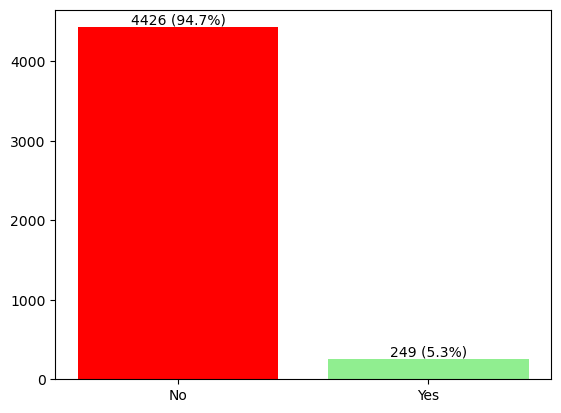

In [25]:
mapping = {0: 'No', 1: 'Yes'}

df_stroke_map = df_feature_ext['stroke'].replace(mapping)
counts = df_stroke_map.value_counts()
percentages = df_stroke_map.value_counts(normalize=True) * 100
bars = plt.bar(counts.index, counts.values, color = ['red', 'lightgreen'], label='Stroke')

# Add count and percentage above each bar
for bar,label in zip(bars, counts.index):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)} ({percentages[label]:.1f}%)', ha='center', va='bottom')

In [26]:
# df_feature_ext = df_feature_ext.drop('stroke', axis=1)
columns = df_feature_ext.columns.to_list()
columns.remove('stroke')
dict_acc, dict_eval = accuracy_all_combinations(df_feature_ext, model, columns)
print_best_acc(dict_acc)
print_eval(dict_eval)

c:\Users\MDv\Studies\Courses\DSTI\virt-env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\MDv\Studies\Courses\DSTI\virt-env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Some progress was made: F1-score is not anymore equal to zero.

Another approach that we can consider for the linear model is trying to give more evidence to the class with less samples. The result belows suggest us that this is a good procedure.

In [27]:
model = LogisticRegression(class_weight='balanced')
dict_acc, dict_eval = accuracy_all_combinations(df_feature_ext, model, columns)
print_best_acc(dict_acc)
print_eval(dict_eval)

The decision above, shows an interesting result: the precision and recall have values that present relatively good score for precision and recall. If we consider that stroke is a serious situation, even if the accuracy is not so great, still it is better to detect true positive than not detect any, even if the accuracy is less.

Now, we will try a different approach using decision trees, and check how it responds to the challenge with balanced classes.

In [28]:
from sklearn.tree import DecisionTreeClassifier

# df_enc_2 = df_stroke.copy()
columns = df_feature_ext.columns.to_list()
columns.remove('stroke')
# df_enc_2 = df_enc_2.drop('stroke', axis=1)

# Create a decision tree classifier
model = DecisionTreeClassifier(class_weight='balanced')
dict_acc, dict_eval = accuracy_all_combinations(df_feature_ext, model, columns)
print_best_acc(dict_acc)
print_eval(dict_eval)


For balanced classes, the algorithm performs better in terms of accuracy but the recall for test continues low, and the more computational demanding. This situation is not the most desirable, and we prefer to stay still with the linear model. 

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=50, class_weight='balanced')
dict_acc, dict_eval = accuracy_all_combinations(df_feature_ext, model, columns)
print_best_acc(dict_acc)
print_eval(dict_eval)

